In [1]:
import ugradio
import numpy as np
import matplotlib.pylab as plt
import inspect
import collections

In [2]:
pwd = '../data/'

def freq_to_period(freq):
    '''take frequency (in kHz)
    and converts to period (in microseconds)'''
    return (1/freq) * 1000

## 6.2.3 calibration
s_cold: horn pointing straight up at the cold sky \
s_cal: horn pointing at the horizon with george and landon standing in front of it \
LO = 1419.405 MHz \
v_samp = 3.2 MHz \
nblocks = 512, no attenuators or amplifiers

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/collections.py:202: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


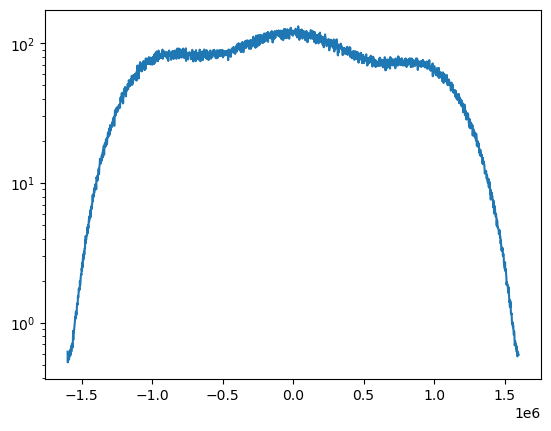

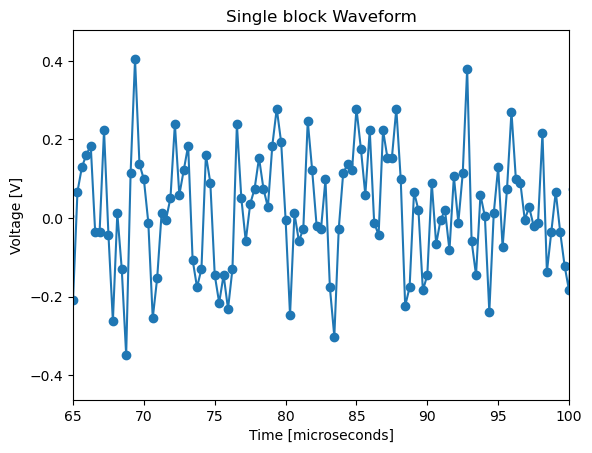

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


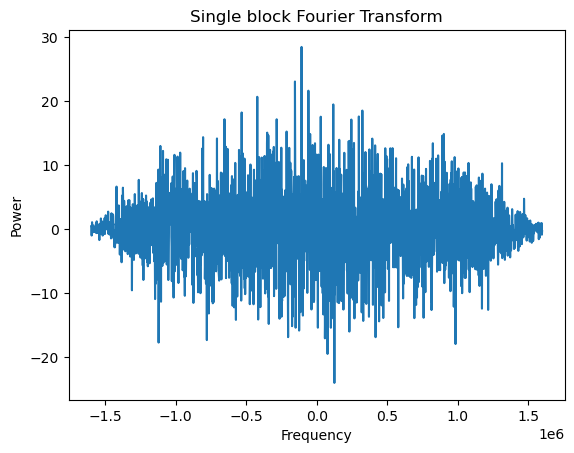

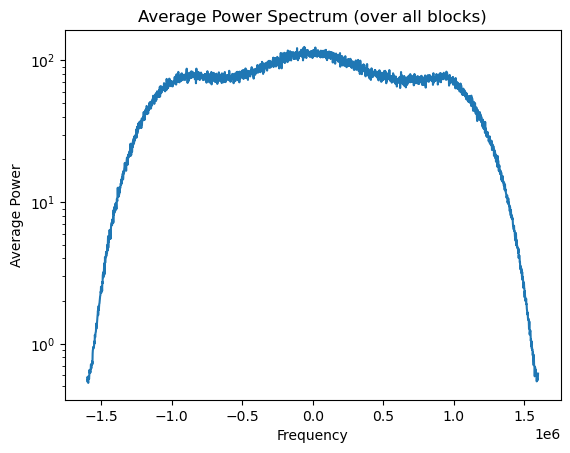

In [15]:
# S COLD
freq = 3.2e6
fname = f'{pwd}s_cold_3200.npy'

data = np.load(fname)
time = np.arange(len(data[0])) * freq_to_period(freq/10**3) # in microseconds

# plot one block of data (waveform)
plt.figure()
plt.plot(time, data[0])
plt.scatter(time, data[0])
plt.xlim(65, 100)
plt.title('Single block Waveform')
plt.xlabel('Time [microseconds]')
plt.ylabel('Voltage [V]')
plt.show()

f = np.fft.fftshift(np.fft.fftfreq(2048, 1/freq))
Fx = np.fft.fftshift(np.fft.fft(data))
pwr = np.abs(Fx)**2
# take average AFTER fourier transform
avg_pwr_cold = np.mean(pwr, axis=0)

# plot one block of data (FT)
plt.figure()
plt.plot(f, Fx[0])
plt.title('Single block Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

# plot data averaged overa ll blocks
plt.figure()
plt.semilogy(f, avg_pwr_cold)
plt.title('Average Power Spectrum (over all blocks)')
plt.xlabel('Frequency')
plt.ylabel('Average Power')
plt.show()

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/collections.py:202: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


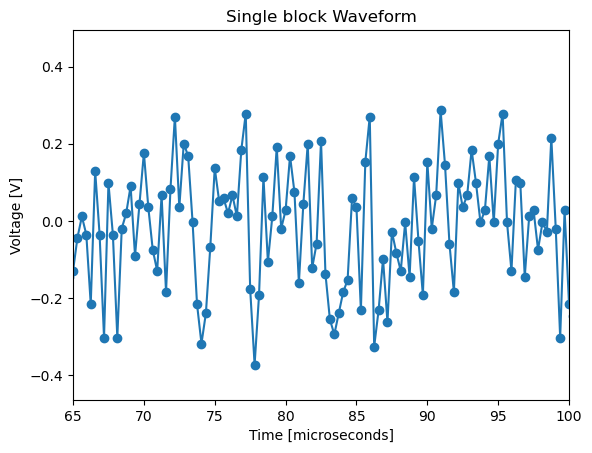

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


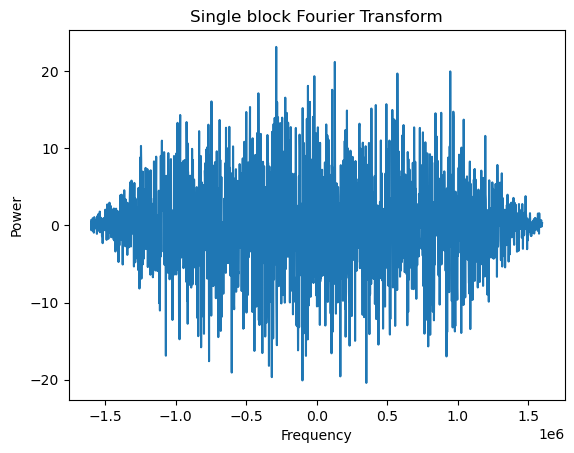

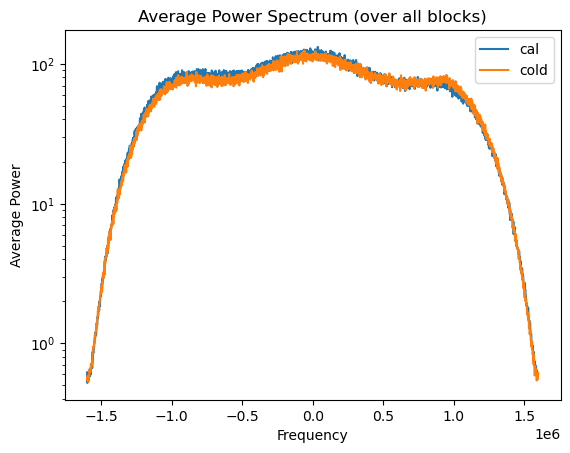

In [19]:
# S CAL
freq = 3.2e6
fname = f'{pwd}s_cal_3200.npy'

data = np.load(fname)
time = np.arange(len(data[0])) * freq_to_period(freq/10**3) # in microseconds

# plot one block of data (waveform)
plt.figure()
plt.plot(time, data[0])
plt.scatter(time, data[0])
plt.xlim(65, 100)
plt.title('Single block Waveform')
plt.xlabel('Time [microseconds]')
plt.ylabel('Voltage [V]')
plt.show()

f = np.fft.fftshift(np.fft.fftfreq(2048, 1/freq))
Fx = np.fft.fftshift(np.fft.fft(data))
pwr = np.abs(Fx)**2
# take average AFTER fourier transform
avg_pwr_cal = np.mean(pwr, axis=0)

# plot one block of data (FT)
plt.figure()
plt.plot(f, Fx[0])
plt.title('Single block Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

# plot data averaged overa ll blocks
plt.figure()
plt.semilogy(f, avg_pwr_cal, label="cal")
plt.semilogy(f, avg_pwr_cold, label="cold")
plt.legend()
plt.title('Average Power Spectrum (over all blocks)')
plt.xlabel('Frequency')
plt.ylabel('Average Power')
plt.show()

## 6.2.2: two frequency-switched line measurements
s_on: spectrum with the line roughly in the upper half of the baseband spectrum, LO=1419.4058 \
s_off: spectrum with the line roughly in the lower half of the baseband spectrum, LO=1420.4058 \
v_samp = 3.2 MHz \
nblocks = 512, no attenuators or amplifiers

8192


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/collections.py:202: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


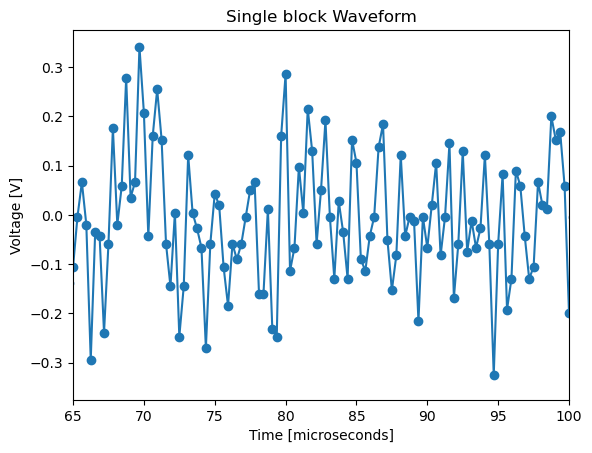

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


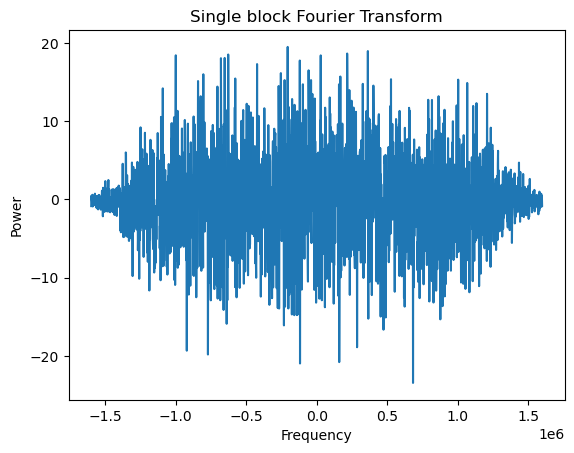

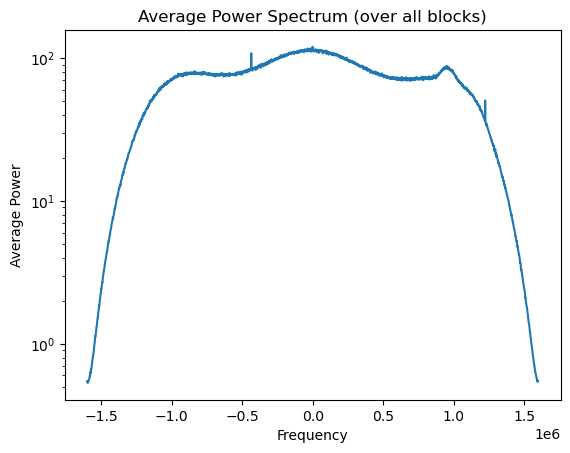

In [25]:
# S ON
freq = 3.2e6
fname = f'{pwd}s_on_3200.npy'

data = np.load(fname)
print(len(data))
time = np.arange(len(data[0])) * freq_to_period(freq/10**3) # in microseconds

# plot one block of data (waveform)
plt.figure()
plt.plot(time, data[0])
plt.scatter(time, data[0])
plt.xlim(65, 100)
plt.title('Single block Waveform')
plt.xlabel('Time [microseconds]')
plt.ylabel('Voltage [V]')
plt.show()

f = np.fft.fftshift(np.fft.fftfreq(2048, 1/freq))
Fx = np.fft.fftshift(np.fft.fft(data))
pwr = np.abs(Fx)**2
# take average AFTER fourier transform
avg_pwr = np.mean(pwr, axis=0)

# plot one block of data (FT)
plt.figure()
plt.plot(f, Fx[0])
plt.title('Single block Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

# plot data averaged overa ll blocks
plt.figure()
plt.semilogy(f, avg_pwr)
plt.title('Average Power Spectrum (over all blocks)')
plt.xlabel('Frequency')
plt.ylabel('Average Power')
plt.show()

on_pwr = avg_pwr

8192


/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)
/usr/lib/python3/dist-packages/matplotlib/collections.py:202: ComplexWarning: Casting complex values to real discards the imaginary part
  offsets = np.asanyarray(offsets, float)


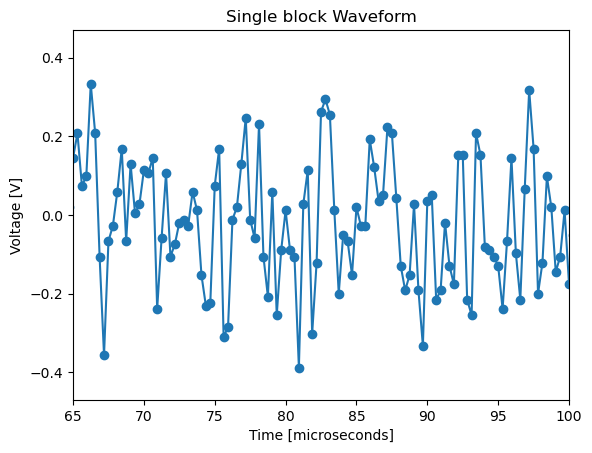

/usr/lib/python3/dist-packages/matplotlib/cbook/__init__.py:1289: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


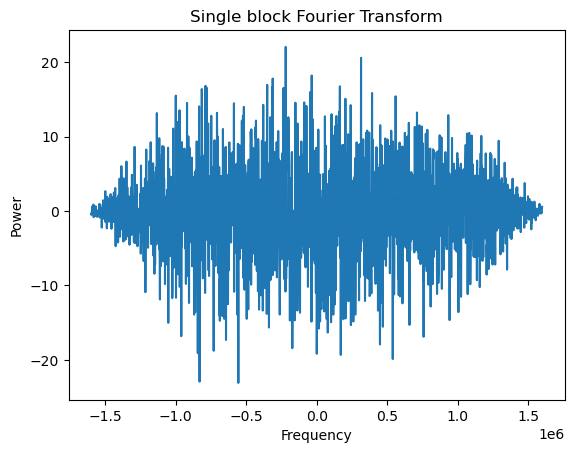

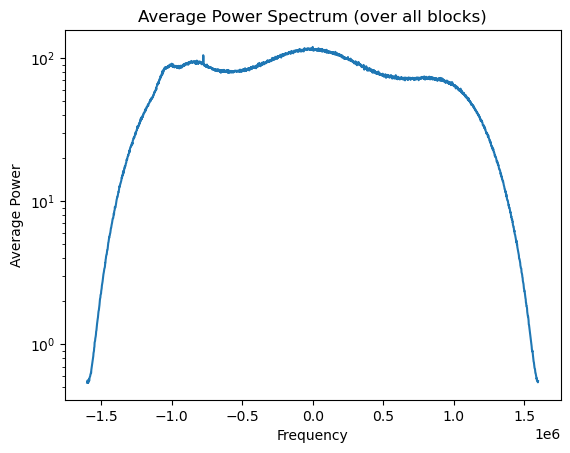

In [26]:
# S OFF
freq = 3.2e6
fname = f'{pwd}s_off_3200.npy'

data = np.load(fname)
print(len(data))
time = np.arange(len(data[0])) * freq_to_period(freq/10**3) # in microseconds

# plot one block of data (waveform)
plt.figure()
plt.plot(time, data[0])
plt.scatter(time, data[0])
plt.xlim(65, 100)
plt.title('Single block Waveform')
plt.xlabel('Time [microseconds]')
plt.ylabel('Voltage [V]')
plt.show()

f = np.fft.fftshift(np.fft.fftfreq(2048, 1/freq))
Fx = np.fft.fftshift(np.fft.fft(data))
pwr = np.abs(Fx)**2
# take average AFTER fourier transform
avg_pwr = np.mean(pwr, axis=0)

# plot one block of data (FT)
plt.figure()
plt.plot(f, Fx[0])
plt.title('Single block Fourier Transform')
plt.xlabel('Frequency')
plt.ylabel('Power')
plt.show()

# plot data averaged overa ll blocks
plt.figure()
plt.semilogy(f, avg_pwr)
plt.title('Average Power Spectrum (over all blocks)')
plt.xlabel('Frequency')
plt.ylabel('Average Power')
plt.show()

off_pwr = avg_pwr

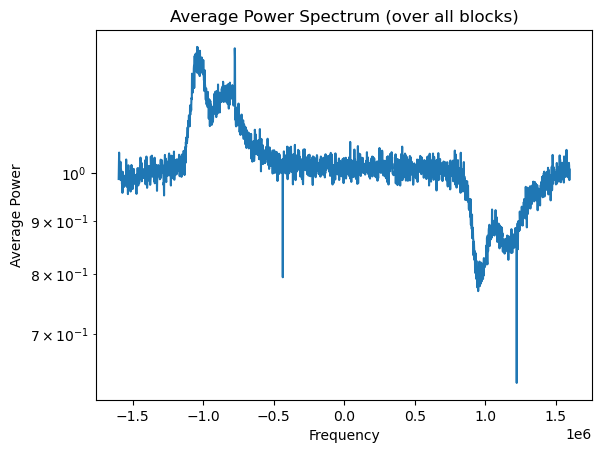

In [27]:
plt.figure()
plt.semilogy(f, off_pwr/on_pwr)
plt.title('Average Power Spectrum (over all blocks)')
plt.xlabel('Frequency')
plt.ylabel('Average Power')
plt.show()